In [1]:
#importing  required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
#reading the csv file
house_sale=pd.read_csv('housesale.csv')

In [3]:
#Print a concise summary of a DataFrame
house_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [4]:
house_sale.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
#storing the master dataframe to another variable
house_sale1=house_sale

### Yearly wise price analysis

In [6]:
#function for finding the quarter of an year
def get_quarter(date_str):
    # Parse the string into a datetime object
    date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    # Determine the quarter based on the month
    quarter = (date.month - 1) // 3 + 1
    return "Q{}".format(quarter)

In [7]:
# Convert the datetime column to datetime objects
house_sale1['datesold'] = pd.to_datetime(house_sale1['datesold'])

In [8]:
# Add a column named year
house_sale1['year'] = house_sale1['datesold'].dt.year

In [9]:
house_sale1.columns

Index(['datesold', 'postcode', 'price', 'propertyType', 'bedrooms', 'year'], dtype='object')

In [10]:
# Add a column named quarter
#house_sale1['quarter'] = house_sale1['datesold'].apply(get_quarter)
house_sale1['quarter'] =  house_sale1['datesold'].dt.quarter
house_sale1['quarter'] = 'Q' + house_sale1['quarter'].astype(str)

In [11]:
house_sale1.head()

,datesold,postcode,price,propertyType,bedrooms,year,quarter
0,2007-02-07,2607,525000,house,4,2007,Q1
1,2007-02-27,2906,290000,house,3,2007,Q1
2,2007-03-07,2905,328000,house,3,2007,Q1
3,2007-03-09,2905,380000,house,4,2007,Q1
4,2007-03-21,2906,310000,house,3,2007,Q1


In [16]:
grouped_data=house_sale1.groupby('year')["price"].mean()
# Find the start and end year


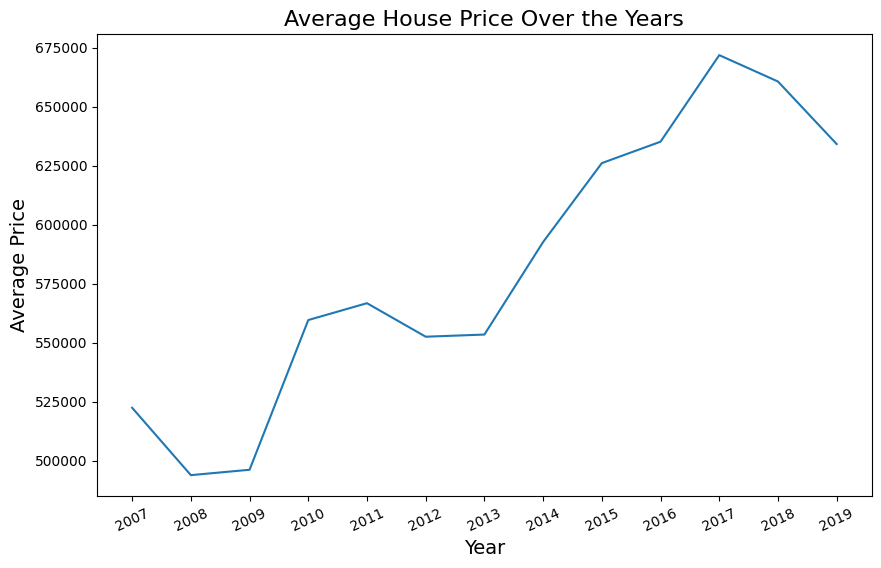

In [21]:
# Adjust the figure size before plotting
plt.figure(figsize=(10, 6)) 

# Grouping and plotting the data
avg_price_by_year = house_sale1.groupby('year')["price"].mean()
avg_price_by_year.plot(kind="line", rot=25)

# Adding labels and title for better understanding
plt.title("Average House Price Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Price", fontsize=14)

# Ensure the start year and end year are explicitly displayed on the x-axis
years = list(avg_price_by_year.index)
plt.xticks(ticks=years, rotation=25)
# Show the plot
plt.show()

### Property type based analysis 

In [22]:
property_count_df=house_sale1.groupby(['propertyType','bedrooms'])['bedrooms'].value_counts().reset_index()

In [24]:
property_count_df.head()

,propertyType,bedrooms,count
0,house,0,19
1,house,1,95
2,house,2,806
3,house,3,11281
4,house,4,10404


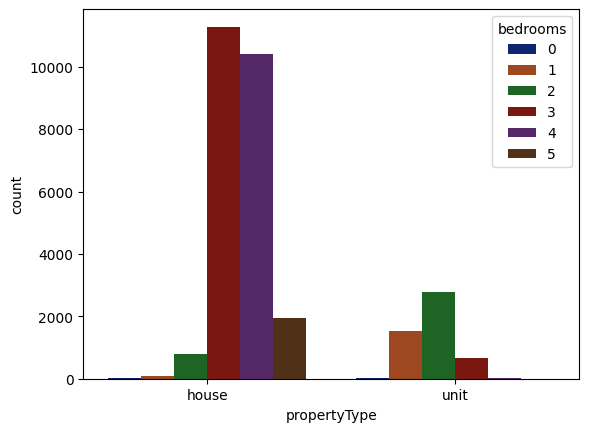

In [55]:
#property analysis by number of properties
sns.barplot(data=property_count_df,x='propertyType',y='count',hue='bedrooms',palette='dark')
plt.show()

In [17]:
#property type analysis w.r.t price

### Analysis based on property type house

In [26]:
#finding the year with max price value
max_year=house_sale1.groupby('year')["price"].mean().reset_index()

In [32]:
max_value=max_year['price'].max()
max_year[max_year['price']==max_value]

,year,price
10,2017,671880.55142


In [33]:
#create a dataframe named df_2017 for years 2013 to 2017 
df_2017=house_sale1[(house_sale1['year']>=2013)&(house_sale1['year']<=2017)]
df_2017.head()

,datesold,postcode,price,propertyType,bedrooms,year,quarter
6382,2013-01-02,2615,615000,house,4,2013,Q1
6383,2013-01-03,2905,582500,house,4,2013,Q1
6384,2013-01-04,2617,475000,house,3,2013,Q1
6385,2013-01-04,2615,630000,house,4,2013,Q1
6386,2013-01-07,2615,398000,house,3,2013,Q1


In [34]:
df_2017_house=df_2017.groupby(['propertyType','bedrooms'])['price'].mean().reset_index()

In [35]:
df_2017_house.head()

,propertyType,bedrooms,price
0,house,0,691972.222222
1,house,1,354768.181818
2,house,2,487787.477578
3,house,3,561281.531716
4,house,4,735303.391815


In [36]:
#filtering the dataframe by property type house
house_2017=df_2017_house[df_2017_house['propertyType']=='house']
house_2017

,propertyType,bedrooms,price
0,house,0,691972.222222
1,house,1,354768.181818
2,house,2,487787.477578
3,house,3,561281.531716
4,house,4,735303.391815
5,house,5,931194.167500


In [37]:
# adding a column named year
house_2017['year']="2017"

/var/folders/6l/q34vfvy57wj3xg0yqx4d0y0c0000gn/T/ipykernel_3560/1167203043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_2017['year']="2017"


In [38]:
house_2017.head()

,propertyType,bedrooms,price,year
0,house,0,691972.222222,2017
1,house,1,354768.181818,2017
2,house,2,487787.477578,2017
3,house,3,561281.531716,2017
4,house,4,735303.391815,2017


In [39]:
#creating a dataframe named df_2019 for the years after 2017
df_2019=house_sale1[(house_sale1['year']>2017) & (house_sale1['year']<=2019)]
df_2019

,datesold,postcode,price,propertyType,bedrooms,year,quarter
20666,2018-01-03,2600,1200000,house,4,2018,Q1
20667,2018-01-05,2611,850000,house,4,2018,Q1
20668,2018-01-05,2617,980000,house,5,2018,Q1
20669,2018-01-08,2600,330000,house,2,2018,Q1
20670,2018-01-08,2615,485000,house,3,2018,Q1
...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,2019,Q3
29576,2019-07-25,2612,560000,unit,2,2019,Q3
29577,2019-07-26,2912,464950,unit,2,2019,Q3
29578,2019-07-26,2601,589000,unit,2,2019,Q3


In [40]:
# filtering the dataframe w.r.t property type house
house_2019=df_2019[df_2019['propertyType']=='house']
house_2019

,datesold,postcode,price,propertyType,bedrooms,year,quarter
20666,2018-01-03,2600,1200000,house,4,2018,Q1
20667,2018-01-05,2611,850000,house,4,2018,Q1
20668,2018-01-05,2617,980000,house,5,2018,Q1
20669,2018-01-08,2600,330000,house,2,2018,Q1
20670,2018-01-08,2615,485000,house,3,2018,Q1
...,...,...,...,...,...,...,...
24547,2019-07-26,2617,610000,house,3,2019,Q3
24548,2019-07-26,2902,657500,house,4,2019,Q3
24549,2019-07-27,2905,610000,house,4,2019,Q3
24550,2019-07-27,2615,647500,house,4,2019,Q3


In [41]:
house_2019=house_2019.groupby(['propertyType','bedrooms'])['price'].mean().reset_index()
house_2019.head()

,propertyType,bedrooms,price
0,house,1,306521.428571
1,house,2,512514.236111
2,house,3,626805.892065
3,house,4,817056.296941
4,house,5,994849.423631


In [42]:
# creating a column named year
house_2019['year']="2019"
house_2019.head()

,propertyType,bedrooms,price,year
0,house,1,306521.428571,2019
1,house,2,512514.236111,2019
2,house,3,626805.892065,2019
3,house,4,817056.296941,2019
4,house,5,994849.423631,2019


In [43]:
# Merge the dataframes house_2017 & house_2019 to align data by bedrooms

merged_df = pd.merge(house_2017, house_2019, how="left",on='bedrooms', suffixes=('_2017', '_2019'))
merged_df.head()

,propertyType_2017,bedrooms,price_2017,year_2017,propertyType_2019,price_2019,year_2019
0,house,0,691972.222222,2017,NaN,NaN,NaN
1,house,1,354768.181818,2017,house,306521.428571,2019
2,house,2,487787.477578,2017,house,512514.236111,2019
3,house,3,561281.531716,2017,house,626805.892065,2019
4,house,4,735303.391815,2017,house,817056.296941,2019


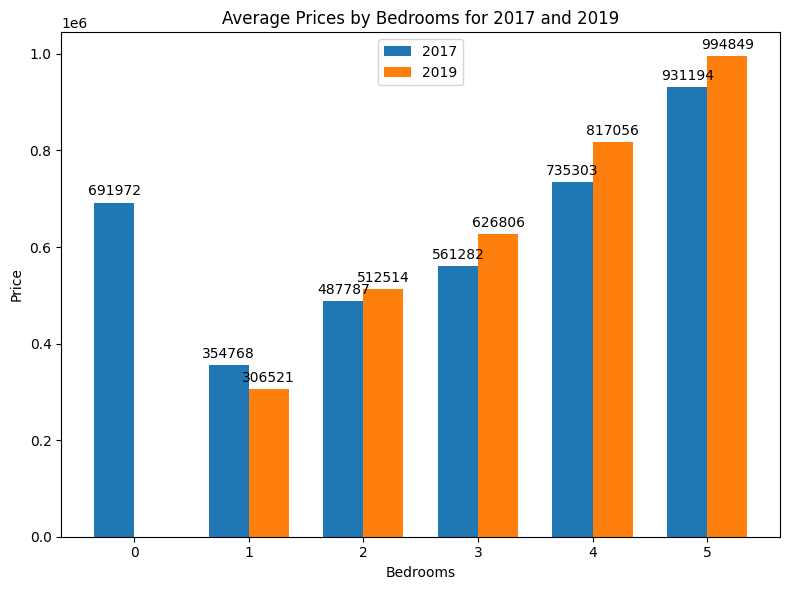

In [44]:
# Plotting
x = np.arange(len(merged_df['bedrooms']))  # The label locations
width = 0.35  # The width of the bars
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, merged_df['price_2017'], width, label='2017')
bars2 = ax.bar(x + width/2, merged_df['price_2019'], width, label='2019')
# Add labels, title, and legend
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Average Prices by Bedrooms for 2017 and 2019')
ax.set_xticks(x)
ax.set_xticklabels(merged_df['bedrooms'])
ax.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    ax.bar_label(bars, fmt='%.0f', padding=3)

# Show plot
plt.tight_layout()
plt.show()

In [45]:
#grouping by propertyType,year and bedrooms for price analysis w.r.t property type house
df_year_2017=df_2017.groupby(['propertyType','year','bedrooms'])['price'].mean().reset_index()
yearly_df_2017=df_year_2017[df_year_2017['propertyType']=='house']
yearly_df_2017.head()

,propertyType,year,bedrooms,price
0,house,2013,0,641333.333333
1,house,2013,1,347590.000000
2,house,2013,2,415064.862745
3,house,2013,3,501899.425056
4,house,2013,4,633378.061924


In [46]:
yearly_df_2017['year']=yearly_df_2017['year'].astype('str')

/var/folders/6l/q34vfvy57wj3xg0yqx4d0y0c0000gn/T/ipykernel_3560/524708233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_df_2017['year']=yearly_df_2017['year'].astype('str')


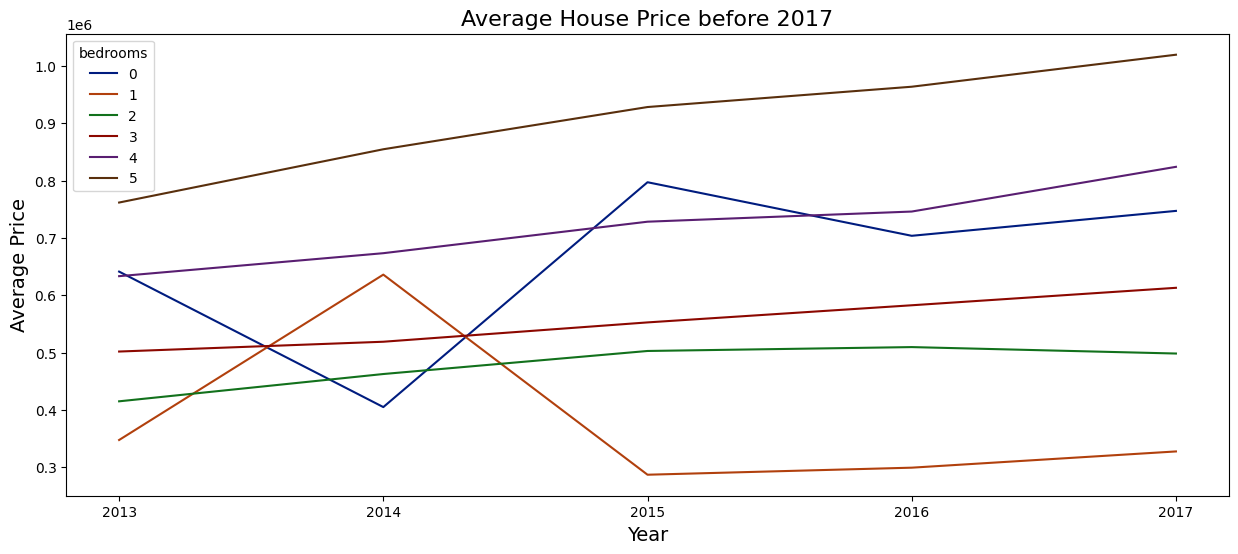

In [69]:
plt.figure(figsize=(15,6))
sns.lineplot(data=yearly_df_2017,x='year',y='price',hue='bedrooms',palette='dark')
# Adding labels and title for better understanding
plt.title("Average House Price before 2017", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.show()

In [49]:
##grouping by propertyType,year and bedrooms for the dataframe 2019 for price analysis
df_year_2019=df_2019.groupby(['propertyType','year','bedrooms'])['price'].mean().reset_index()
df_year_2019.head()

,propertyType,year,bedrooms,price
0,house,2018,1,2.993462e+05
1,house,2018,2,5.297675e+05
2,house,2018,3,6.291225e+05
3,house,2018,4,8.315835e+05
4,house,2018,5,1.015531e+06


In [50]:
yearly_df_2019=df_year_2019[df_year_2019['propertyType']=='house']
yearly_df_2019.head()

,propertyType,year,bedrooms,price
0,house,2018,1,2.993462e+05
1,house,2018,2,5.297675e+05
2,house,2018,3,6.291225e+05
3,house,2018,4,8.315835e+05
4,house,2018,5,1.015531e+06


In [51]:
yearly_df_2019['year']=yearly_df_2019['year'].astype('str')

/var/folders/6l/q34vfvy57wj3xg0yqx4d0y0c0000gn/T/ipykernel_3560/3588533648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_df_2019['year']=yearly_df_2019['year'].astype('str')


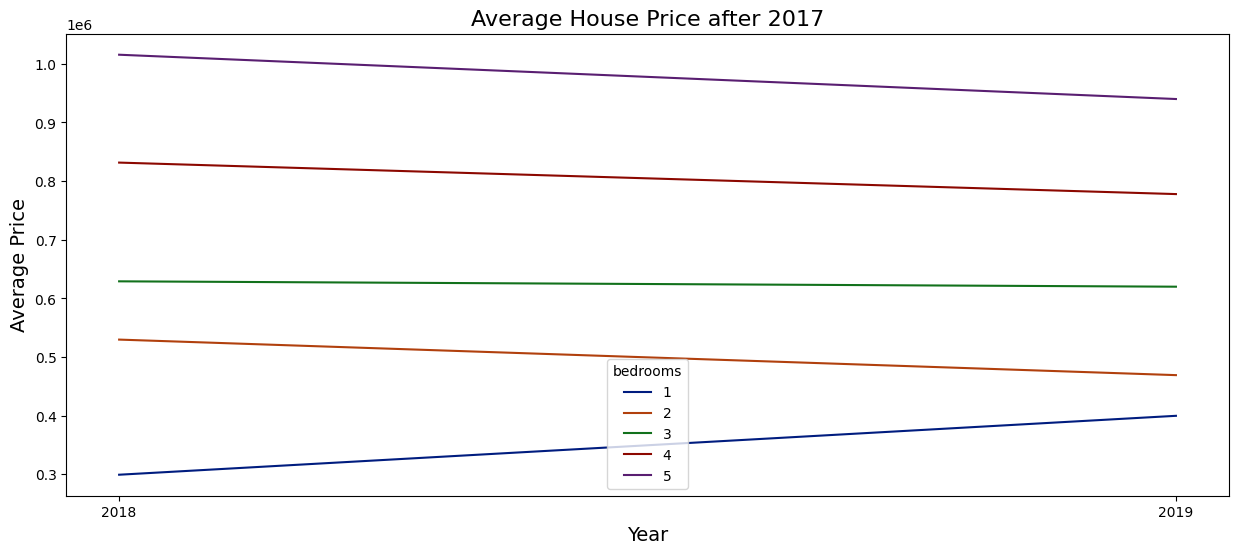

In [70]:
plt.figure(figsize=(15,6))
sns.lineplot(data=yearly_df_2019,x='year',y='price',hue='bedrooms',palette='dark')
# Adding labels and title for better understanding
plt.title("Average House Price after 2017", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.show()

In [53]:
# finding  the number of houses according to the price
yearly_df_2017.head()

,propertyType,year,bedrooms,price
0,house,2013,0,641333.333333
1,house,2013,1,347590.000000
2,house,2013,2,415064.862745
3,house,2013,3,501899.425056
4,house,2013,4,633378.061924


In [56]:
df_2017.groupby(['propertyType','year','bedrooms'])['bedrooms'].value_counts()

propertyType  year  bedrooms
house         2013  0              6
                    1              5
                    2             51
                    3            894
                    4            759
                    5            126
              2014  0              1
                    1              7
                    2             60
                    3           1150
                    4           1077
                    5            212
              2015  0              4
                    1              7
                    2             86
                    3           1336
                    4           1414
                    5            246
              2016  0              5
                    1             17
                    2            113
                    3           1474
                    4           1312
                    5            292
              2017  0              2
                    1             19
         

In [57]:
#grouping by propertyType,year and bedrooms
bedroom_count_2017=df_2017.groupby(['propertyType','year','bedrooms'])['bedrooms'].value_counts().reset_index()
bedroom_count_2017.head()

,propertyType,year,bedrooms,count
0,house,2013,0,6
1,house,2013,1,5
2,house,2013,2,51
3,house,2013,3,894
4,house,2013,4,759


In [58]:
#bedroom_count_2017=bedroom_count_2017[["propertyType","year","bedrooms","datesold"]]


In [47]:
#bedroom_count_2017.columns=['propertyType', 'year', 'bedrooms', 'count']

In [59]:
#bedroom_count_2017.head()

In [60]:
#filterinf w.r.t property type house
house_count_2017=bedroom_count_2017[bedroom_count_2017['propertyType']=='house']

In [62]:
house_count_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   propertyType  30 non-null     object
 1   year          30 non-null     int32 
 2   bedrooms      30 non-null     int64 
 3   count         30 non-null     int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 1.1+ KB


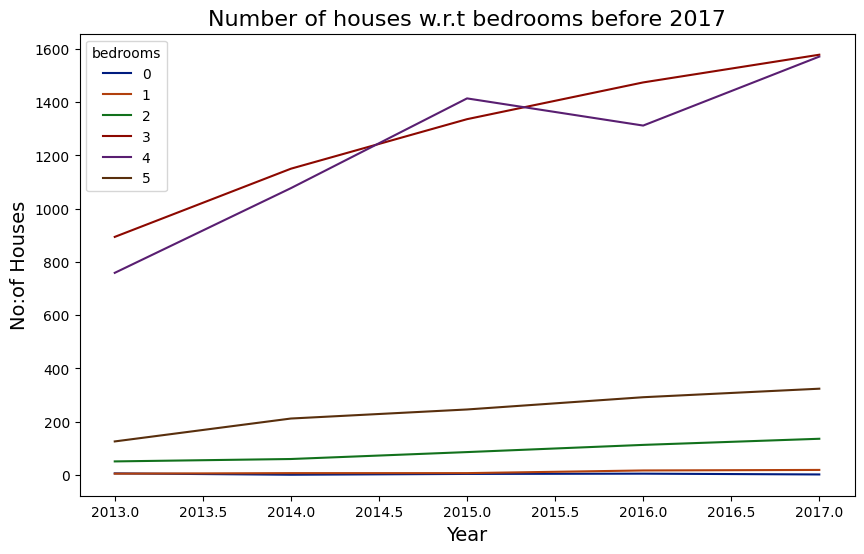

In [71]:
plt.figure(figsize=(10,6))
sns.lineplot(data=house_count_2017,x='year',y='count',hue='bedrooms',palette='dark')
# Adding labels and title for better understanding
plt.title("Number of houses w.r.t bedrooms before 2017", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("No:of Houses", fontsize=14)
plt.show()

In [66]:
bedroom_count_2019=df_2019.groupby(['propertyType','year','bedrooms'])['bedrooms'].value_counts().reset_index()
bedroom_count_2019.head()

,propertyType,year,bedrooms,count
0,house,2018,1,13
1,house,2018,2,103
2,house,2018,3,1280
3,house,2018,4,1216
4,house,2018,5,252


In [67]:
house_count_2019=bedroom_count_2019[bedroom_count_2019['propertyType']=='house']

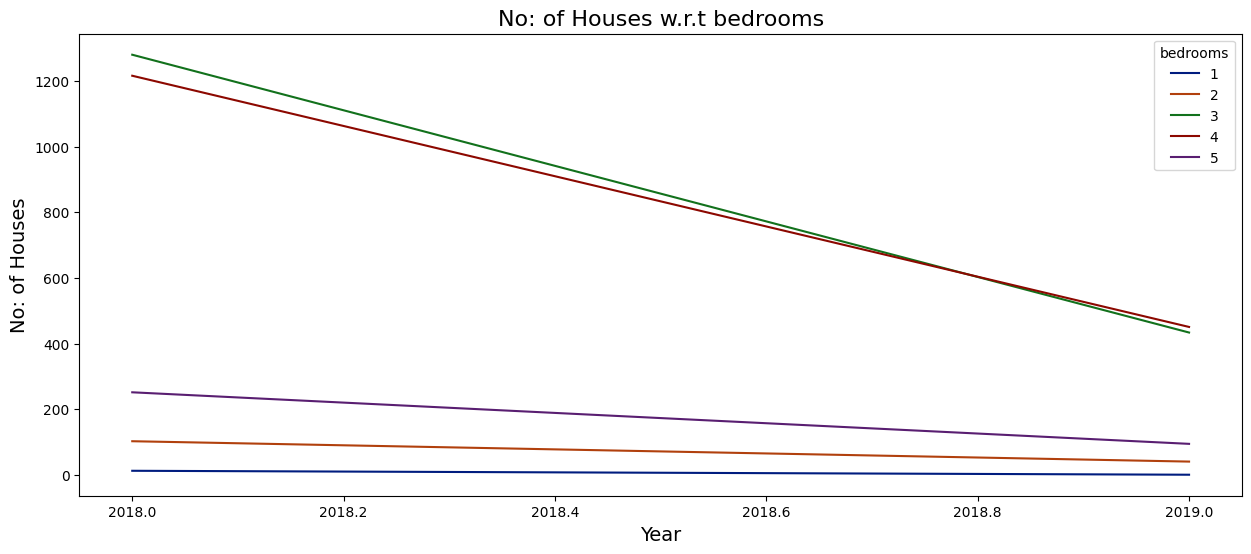

In [72]:
plt.figure(figsize=(15,6))
sns.lineplot(data=house_count_2019,x='year',y='count',hue='bedrooms',palette='dark')
# Adding labels and title for better understanding
plt.title("No: of Houses w.r.t bedrooms", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("No: of Houses", fontsize=14)
plt.show()